In [0]:
import numpy as np
import pandas as pd
import random

In [0]:
data = pd.read_excel('Dataset_Question2.xlsx')    #importing data

In [184]:
#Group the feature columns as X
features_col = ['Temperature', 'Pressure', 'Feed Flow rate',	'Coolant Flow rate',	'Inlet reactant concentration']
X = data[features_col]
X[:5]

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
0,406.86,17.66,121.83,2109.20,0.1033
1,693.39,24.66,133.18,3138.96,0.3785
2,523.10,23.23,146.55,1058.24,0.4799
3,612.86,40.97,94.44,1325.12,0.3147
4,500.28,37.44,185.48,2474.51,0.2284


In [0]:
#Define output column
Y = data['Test']

In [0]:
#Converting the categorical output to quantitative
Y = [1 if i == "Pass" else 0 for i in Y]

In [0]:
#Standardizing the features
import sklearn
from sklearn import preprocessing
X = preprocessing.scale(X)

In [0]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# New Section

In [0]:
#Setting learning rate and iterations
lr = 0.1
iterations = 10000
initializations = 1

In [0]:
#Defining no. of samples and features
nsamples, nfeatures = X.shape

In [0]:
kf = 7
test_size= int(nsamples/kf)

In [0]:
#Defining the sigmoid funtion
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [0]:
#Defining Cost, Coefficients and self bias matrix

J = np.zeros(initializations*7*kf).reshape(initializations, 7, kf)
cost = np.zeros(initializations*iterations*kf).reshape(iterations, initializations, kf)

In [194]:
#Gradient Descent

for k in range (kf):
    
    X_test = X[k*test_size:k*test_size + test_size]
    
    X_train_a = X[:k*test_size]
    X_train_b = X[k*test_size + test_size:]

    X_train =  np.concatenate([X_train_a, X_train_b])

    Y_test = Y[k*test_size:k*test_size + test_size]
    
    Y_train_a = Y[:k*test_size]
    Y_train_b = Y[k*test_size + test_size:]

    Y_train =  np.concatenate([Y_train_a, Y_train_b])    
    

    for i in range(initializations):
        #beta = random.sample(range(-5, 5), 5)
        #bias = random.sample(range(-5, 5), 1)
        beta = np.zeros(nfeatures)
        bias = 0

        for j in range(iterations):
            lin_comb_train = np.dot(X_train, beta) + bias
            
            model_train = sigmoid(lin_comb_train)

            dbeta = (1 / len(Y_train)) * np.dot(X_train.T, (model_train - Y_train))
            dbias = (1 / len(Y_train)) * np.sum(model_train - Y_train)
           
            beta = beta - lr * dbeta
            bias = bias - lr * dbias
            

            cost[j][i][k] = -(1 / len(Y_train)) * ( np.dot(Y_train, np.log(model_train)) + np.dot((np.ones(len(Y_train))-Y_train), (np.log(np.ones(len(Y_train))-model_train))))

        print (beta)
        print (bias)
   
      
        J[i][0][k] = cost[iterations-1][i][k]
        for m in range (5):
          J[i][m+1][k] = beta[m]
        J[i][6][k] = bias 

[-0.18368877 -0.56430158 -0.75615663  3.64953021 -0.05423011]
1.1389112035391873
[-0.36038575 -0.53996577 -0.7857422   4.02426437 -0.12670316]
1.379529389891924
[-0.30674201 -0.5850458  -0.70347154  3.52475713 -0.09191986]
1.1641633231425934
[-0.1154564  -0.54159769 -0.70731301  3.54973648 -0.0943842 ]
1.1460089739556736
[-0.1435227  -0.61543712 -0.80608573  3.97514568 -0.11435069]
1.4260464869500569
[-0.23137061 -0.71322744 -0.7941818   4.37344988 -0.16607466]
1.5192365813175193
[-0.27838565 -0.50659279 -0.7705531   3.6581167  -0.21665344]
1.180917029697607


In [195]:
J[:,0,:]

array([[0.27220416, 0.25118119, 0.27627531, 0.2656593 , 0.25025067,
        0.23026361, 0.26825619]])

In [196]:
minElement = np.amin(J[:,0,:])
minElement

0.23026360789244527

In [197]:
result = np.where(J == minElement)
int(result[2])

5

In [198]:
result

(array([0]), array([0]), array([5]))

In [199]:
print(J[result])

[0.23026361]


In [200]:
print (J[result], "is the minimum value of cost funtion")

[0.23026361] is the minimum value of cost funtion


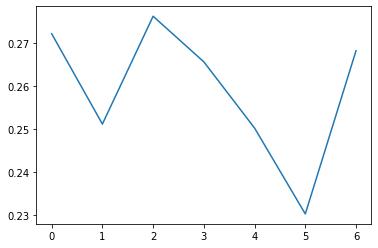

In [201]:
#Plot the cost function values for all initializations

import matplotlib.pyplot as plt
plt.plot(J[0,0,:])

0.23026360789244527

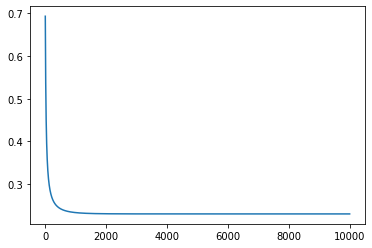

In [202]:
plt.plot(cost[:,int(result[0]),int(result[2])])
cost[-1,int(result[0]),int(result[2])]

In [0]:
beta = np.zeros(nfeatures)
bias = 0
for i in range (kf):
    bias = bias + J[int(result[0]), 6,i]
    beta = beta + J[int(result[0]), 1:6, i]
beta=beta/kf
beta = beta.reshape(5,1)
bias = bias/kf

In [0]:
#beta = J[int(result[0]), 1:6, int(result[2])]
#bias = J[int(result[0]), 6, int(result[2])]

In [205]:
print(beta)

print(bias)

[[-0.23136456]
 [-0.58088117]
 [-0.76050057]
 [ 3.82214292]
 [-0.12347373]]
1.2792589983563658


In [0]:
features_col = ['Temperature', 'Pressure', 'Feed Flow rate',	'Coolant Flow rate',	'Inlet reactant concentration']
X = data[features_col]
Y = data['Test']
Y = [1 if i == "Pass" else 0 for i in Y]
X = preprocessing.scale(X)

In [0]:
#Test-train split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [208]:
X.shape

(1000, 5)

In [0]:
#Running model over test data

lin_comb_test = np.dot(X_test, beta) + bias
model_test = sigmoid(lin_comb_test)

In [0]:
#Converting probabilities to categories
model_test_label = [1 if i > 0.5 else 0 for i in model_test]        

In [211]:
model_test_label[:10]   #checking output

[0, 1, 1, 1, 1, 0, 1, 0, 1, 1]

In [212]:
#Creating confusion matrix

import sklearn
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, model_test_label)
cnf_matrix

array([[121,   7],
       [  6, 166]])

In [213]:
beta    #check coefficients

array([[-0.23136456],
       [-0.58088117],
       [-0.76050057],
       [ 3.82214292],
       [-0.12347373]])

In [214]:
bias    #Check self bias

1.2792589983563658

In [215]:
Accuracy = (cnf_matrix[0][0] + cnf_matrix[1][1])/(cnf_matrix[0][0] + cnf_matrix[1][1] + cnf_matrix[0][1] + cnf_matrix[1][0])
Accuracy

0.9566666666666667

In [222]:
print(sklearn.metrics.accuracy_score(Y_test, model_test_label)
print(sklearn.metrics.f1_score(Y_test, model_test_label))
print(sklearn.metrics.balanced_accuracy_score(Y_test, model_test_label))
print(sklearn.metrics.precision_score(Y_test, model_test_label))
print(sklearn.metrics.recall_score(Y_test, model_test_label))

SyntaxError: ignored

Text(0.5, 257.44, 'Predicted label')

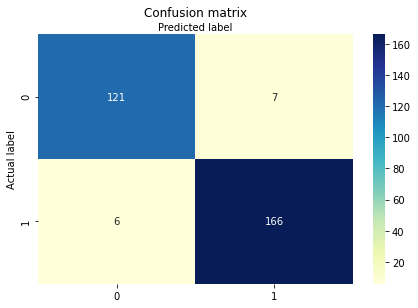

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [217]:
lin_comb_train = np.dot(X_train, beta) + bias
            
model_train = sigmoid(lin_comb_train)
model_train_label = [1 if i > 0.5 else 0 for i in model_train]

import sklearn
from sklearn import metrics
cnf_matrix2 = metrics.confusion_matrix(Y_train, model_train_label)
cnf_matrix2

array([[268,  19],
       [ 16, 397]])

In [218]:
Accuracy_train = (cnf_matrix2[0][0] + cnf_matrix2[1][1])/(cnf_matrix2[0][0] + cnf_matrix2[1][1] + cnf_matrix2[0][1] + cnf_matrix2[1][0])
Accuracy_train

0.95